In [1]:
import env
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import wrangle
import os
import sys

In [2]:
# df=wrangle.wrangle()
df = pd.read_csv('sql_pull.csv')

In [3]:
# df.to_csv('sql_pull.csv')

In [4]:
df.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
0,2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev
1,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev
3,2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev
4,2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [5]:
df.date_time = pd.to_datetime(df.date_time)
df = df.set_index(df.date_time)
df.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
date_time,,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2018-01-26 09:56:05,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev
2018-01-26 09:56:06,2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev
2018-01-26 10:40:15,2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [6]:
df.index.max(), df.index.min()

(Timestamp('2021-04-21 16:44:39'), Timestamp('2018-01-26 09:55:03'))

In [7]:
df[df.program_id ==3].cohort_name.value_counts()

Darden      32015
Bayes       26538
Curie       21582
Easley      14715
Florence     8562
Name: cohort_name, dtype: int64

program_id 3 is full stack java
4 is front end
2 is full stack java??

In [120]:
temp.program.value_counts()

java_web_dev         653272
data_science          79555
php_web_dev           28529
front_end_web_dev         4
Name: program, dtype: int64

In [128]:
temp[temp.program=='php_web_dev'].index, temp[temp.program=='java_web_dev'].index

(DatetimeIndex(['2018-01-26 09:56:02', '2018-01-26 09:56:05',
                '2018-01-26 09:56:06', '2018-01-26 10:40:15',
                '2018-01-26 11:26:13', '2018-01-27 07:49:25',
                '2018-01-29 11:41:51', '2018-01-29 11:43:08',
                '2018-01-29 15:06:28', '2018-01-29 15:07:31',
                ...
                '2020-08-10 15:59:29', '2020-08-10 15:59:44',
                '2020-08-10 15:59:48', '2020-08-10 15:59:58',
                '2020-08-10 16:00:00', '2020-08-10 16:01:36',
                '2020-08-10 16:02:08', '2020-08-11 09:36:13',
                '2020-08-11 09:37:04', '2020-08-11 09:46:33'],
               dtype='datetime64[ns]', name='date_time', length=28529, freq=None),
 DatetimeIndex(['2018-12-08 18:25:15', '2018-12-08 18:25:20',
                '2018-12-14 08:29:03', '2018-12-14 08:29:04',
                '2018-12-17 10:05:26', '2018-12-17 10:05:28',
                '2018-12-17 17:37:07', '2018-12-17 17:37:12',
                '2018-12-18 

## Jared and I have agreed to focus on t Java Web Dev and Data Science, skipping php web dev and the front end web dev that has so few observations

In [8]:
df.endpoint.sample(50)

date_time
2020-07-06 08:52:55                                                    /
2019-05-29 14:02:05                                                  toc
2020-11-05 12:56:42    javascript-i/introduction/working-with-data-ty...
2018-06-27 15:13:22                                               jquery
2018-04-27 14:56:41                                html-css/css-ii/grids
2018-12-06 11:22:51                                   mysql/introduction
2019-04-30 09:59:57                                               spring
2021-01-26 14:29:15                                        java-iii/jdbc
2020-08-12 15:55:55                                                    /
2021-03-17 00:11:45                               fundamentals/cli/intro
2018-03-29 10:25:29                      spring/fundamentals/controllers
2018-07-17 20:20:43                        content/php_iii/php-with-html
2018-05-09 16:05:16                          java-i/introduction-to-java
2018-08-21 09:08:42                      

In [9]:
bayes = df[df.cohort_name =='Bayes']
curie = df[df.cohort_name =='Curie']
darden = df[df.cohort_name =='Darden']
easley = df[df.cohort_name =='Easley']
florence = df[df.cohort_name =='Florence']

In [10]:
print(bayes.shape)
print(curie.shape)
print(darden.shape)
print(easley.shape)
print(florence.shape)

(26538, 15)
(21582, 15)
(32015, 15)
(14715, 15)
(8562, 15)


In [11]:
# Get cohort counts
print(len(bayes.user_id.unique()))
print(len(curie.user_id.unique()))
print(len(darden.user_id.unique()))
print(len(easley.user_id.unique()))
print(len(florence.user_id.unique()))

23
21
29
17
21


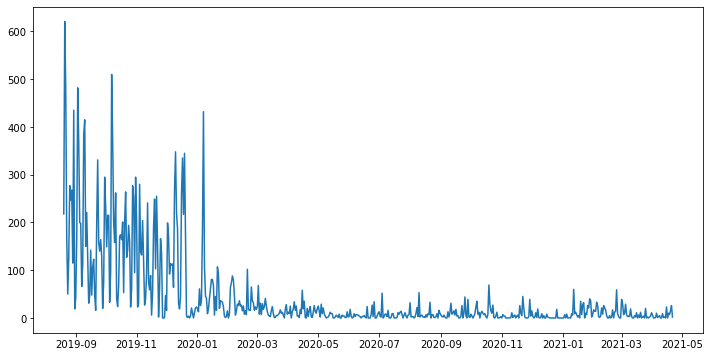

In [12]:
fig, ax =plt.subplots(figsize=(12,6))

x = bayes.date
y = bayes['endpoint'].resample('d').count()

ax.plot(y)

plt.show()

In [13]:
df.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
date_time,,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2018-01-26 09:56:05,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev
2018-01-26 09:56:06,2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev
2018-01-26 10:40:15,2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [14]:
df.groupby(by=['program','endpoint']).agg('count').user_id

program       endpoint                        
data_science  %20https://github.com/RaulCPena        1
              ,%20https://github.com/RaulCPena       1
              .gitignore                             1
              /                                   8358
              1-fundamentals                        10
                                                  ... 
php_web_dev   web-design/ui/color                   27
              web-design/ui/typography              29
              web-design/ui/visuals                 26
              web-design/ux/layout                  29
              web-design/ux/purpose                 29
Name: user_id, Length: 3309, dtype: int64

In [15]:
# temp = df[df.endpoint != '/']

In [16]:
# temp.groupby(by=['program']).endpoint.value_counts()

In [17]:
# temp.endpoint.value_counts().head(10)

In [18]:
df.endpoint.str.endswith('/')

date_time
2018-01-26 09:55:03     True
2018-01-26 09:56:02    False
2018-01-26 09:56:05    False
2018-01-26 09:56:06    False
2018-01-26 10:40:15    False
                       ...  
2021-04-21 09:09:42    False
2021-04-21 09:29:08    False
2021-04-21 10:05:39    False
2021-04-21 11:01:19    False
2021-04-21 11:01:23    False
Name: endpoint, Length: 847330, dtype: object

In [19]:
temp = df.copy()
temp['drop_me'] = temp.endpoint.str.contains('.jpg|.svg|.json|.jpeg', regex=True) | temp.endpoint.str.endswith('/')
temp.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me
date_time,,,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev,True
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev,False
2018-01-26 09:56:05,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev,False
2018-01-26 09:56:06,2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev,False
2018-01-26 10:40:15,2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev,False


In [20]:
# temp[temp.drop_me == False].endpoint.value_counts()
temp = temp[temp.drop_me == False]

In [21]:
temp.endpoint.value_counts()

javascript-i                            18203
toc                                     17591
java-iii                                13166
html-css                                13127
java-ii                                 12177
                                        ...  
slides/form                                 1
nlp                                         1
job-board                                   1
11-distributed-ml/6.4-prepare-part-4        1
logouts                                     1
Name: endpoint, Length: 2147, dtype: int64

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


In [22]:
temp.program.value_counts().index

Index(['java_web_dev', 'data_science', 'php_web_dev', 'front_end_web_dev'], dtype='object')

In [23]:
programs = ['java_web_dev', 'data_science', 'php_web_dev', 'front_end_web_dev']
for x in programs:
    print(f'The top ten endoints for {x} are {temp[temp.program == x].endpoint.value_counts().head(10)}')



# temp[temp.program == 'data_science'].endpoint.value_counts().head(10)

The top ten endoints for java_web_dev are javascript-i     17457
toc              17428
java-iii         12683
html-css         12569
java-ii          11719
spring           11376
jquery           10693
mysql            10318
java-i           10016
javascript-ii     9861
Name: endpoint, dtype: int64
The top ten endoints for data_science are classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
6-regression/1-overview                     1124
anomaly-detection/overview                   804
10-anomaly-detection/1-overview              751
3-sql/1-mysql-overview                       707
stats/compare-means                          668
python/data-types-and-variables              667
Name: endpoint, dtype: int64
The top ten endoints for php_web_dev are index.html       1011
javascript-i      736
html-css          542
spring            501
java-iii 

- is there a difference between javascript-i and java-i? maybe renamed at some point?
- 

In [30]:
temp[temp.program == 'data_science'].endpoint.value_counts().head(10)

classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
6-regression/1-overview                     1124
anomaly-detection/overview                   804
10-anomaly-detection/1-overview              751
3-sql/1-mysql-overview                       707
stats/compare-means                          668
python/data-types-and-variables              667
Name: endpoint, dtype: int64

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


In [31]:
temp.head(1)

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me
date_time,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev,False


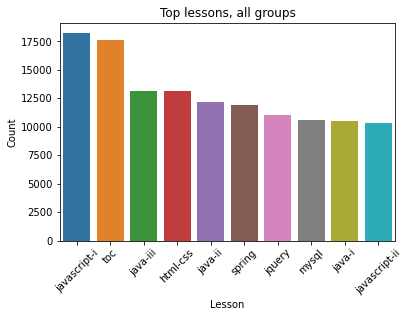

,endpoint
javascript-i,18203
toc,17591
java-iii,13166
html-css,13127
java-ii,12177
spring,11883
jquery,11041
mysql,10611
java-i,10467
javascript-ii,10294


In [45]:
# Top 5 lessons for all Groups
top_lessons = pd.DataFrame(temp.endpoint.value_counts().head(10))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_lessons,
y="endpoint", x=top_lessons.index)
plt.title('Top lessons, all groups')
plt.xlabel('Lesson')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
top_lessons

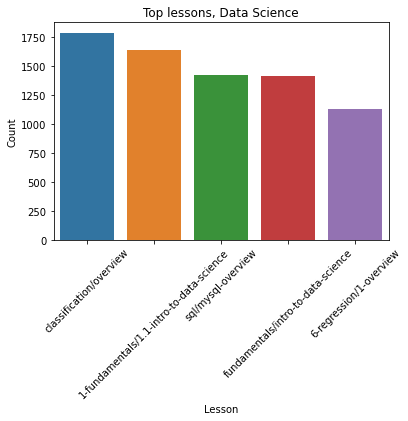

,endpoint
classification/overview,1785
1-fundamentals/1.1-intro-to-data-science,1633
sql/mysql-overview,1424
fundamentals/intro-to-data-science,1413
6-regression/1-overview,1124


In [54]:
# Top lessons for PHP Web Dev
top_lessons = pd.DataFrame(temp[temp.program == 'data_science'].endpoint.value_counts().head(5))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_lessons,
y="endpoint", x=top_lessons.index)#, hue='cohort_name')
plt.title('Top lessons, Data Science')
plt.xlabel('Lesson')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
top_lessons

In [129]:
ds_df = temp[temp.program == 'data_science']
ds_df.head(2)

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me
date_time,,,,,,,,,,,,,,,,
2020-12-08 10:58:31,2020-12-08 10:58:31,2020-12-08,10:58:31,fundamentals/intro-to-data-science,143,133.0,68.201.242.151,Easley,2020-12-07,2021-06-08,3,2,2020-12-08 10:58:31,-182 days,data_science,False
2020-12-08 15:13:06,2020-12-08 15:13:06,2020-12-08,15:13:06,fundamentals/data-science-pipeline,143,133.0,68.201.242.151,Easley,2020-12-07,2021-06-08,3,2,2020-12-08 15:13:06,-182 days,data_science,False


In [68]:
ds_df.endpoint.value_counts().head(10)

classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
6-regression/1-overview                     1124
anomaly-detection/overview                   804
10-anomaly-detection/1-overview              751
3-sql/1-mysql-overview                       707
stats/compare-means                          668
python/data-types-and-variables              667
Name: endpoint, dtype: int64

In [130]:
# plot_order = ds_df.groupby('endpoint')['Deaths'].sum().sort_values(ascending=False).index.values
# plt.figure(figsize=(20,10))
# sns.countplot(data=ds_df, x='endpoint',hue='cohort_name')

In [134]:
ds_graph_set = ds_df[ds_df.endpoint.isin(['classification/overview', '1-fundamentals/1.1-intro-to-data-science',
       'sql/mysql-overview', 'fundamentals/intro-to-data-science',
       '6-regression/1-overview', 'anomaly-detection/overview',
       '10-anomaly-detection/1-overview', '3-sql/1-mysql-overview',
       'stats/compare-means', 'python/data-types-and-variables'])]
# ds_graph_set

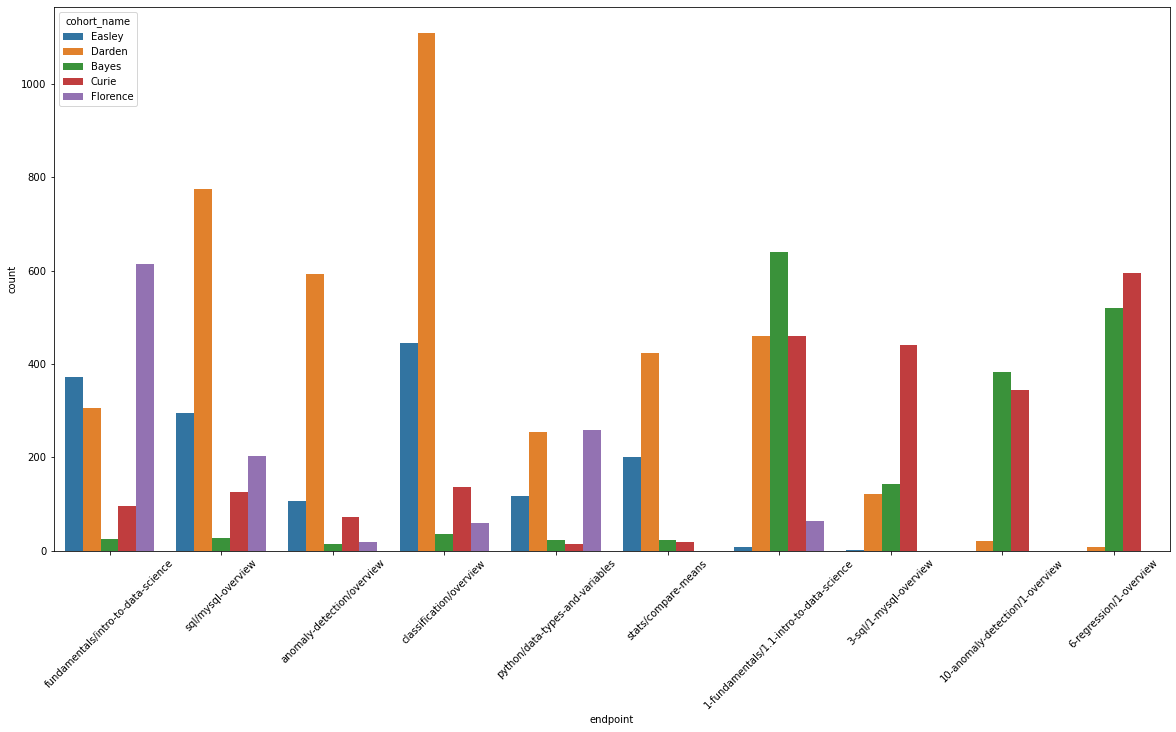

In [141]:
plt.figure(figsize=(20,10))
sns.countplot(data=ds_graph_set, x='endpoint',hue='cohort_name')
plt.xticks(rotation=45);

In [137]:
java_wd_df = temp[temp.program == 'java_web_dev']
java_wd_df.head(2)

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me
date_time,,,,,,,,,,,,,,,,
2018-12-08 18:25:15,2018-12-08 18:25:15,2018-12-08,18:25:15,mysql,1,28.0,72.177.229.125,Staff,2014-02-04,2014-02-04,2,2,2018-12-08 18:25:15,1768 days,java_web_dev,False
2018-12-08 18:25:20,2018-12-08 18:25:20,2018-12-08,18:25:20,mysql/clauses,1,28.0,72.177.229.125,Staff,2014-02-04,2014-02-04,2,2,2018-12-08 18:25:20,1768 days,java_web_dev,False


In [139]:
java_wd_df.endpoint.value_counts().head(10).index

Index(['javascript-i', 'toc', 'java-iii', 'html-css', 'java-ii', 'spring',
       'jquery', 'mysql', 'java-i', 'javascript-ii'],
      dtype='object')

In [143]:
java_wd_graph_set = java_wd_df[java_wd_df.endpoint.isin(['javascript-i', 'toc', 'java-iii', 'html-css', 'java-ii', 'spring',
       'jquery', 'mysql', 'java-i', 'javascript-ii'])]
java_wd_graph_set = java_wd_graph_set[java_wd_graph_set.cohort_name != 'Staff']
java_wd_graph_set.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program,drop_me
date_time,,,,,,,,,,,,,,,,
2018-01-29 22:34:31,2018-01-29 22:34:31,2018-01-29,22:34:31,javascript-i,2,22.0,67.11.104.47,Teddy,2018-01-08,2018-05-17,2,1,2018-01-29 22:34:31,-108 days,java_web_dev,False
2018-01-30 14:59:09,2018-01-30 14:59:09,2018-01-30,14:59:09,jquery,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,2018-01-30 14:59:09,-107 days,java_web_dev,False
2018-01-30 14:59:20,2018-01-30 14:59:20,2018-01-30,14:59:20,javascript-ii,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,2018-01-30 14:59:20,-107 days,java_web_dev,False
2018-01-30 14:59:30,2018-01-30 14:59:30,2018-01-30,14:59:30,java-i,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,2018-01-30 14:59:30,-107 days,java_web_dev,False
2018-01-30 15:00:05,2018-01-30 15:00:05,2018-01-30,15:00:05,javascript-i,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,2018-01-30 15:00:05,-107 days,java_web_dev,False


In [157]:
java_wd_graph_set.cohort_name.sort_values().unique()

array(['Andromeda', 'Apex', 'Bash', 'Betelgeuse', 'Ceres', 'Deimos',
       'Europa', 'Fortuna', 'Ganymede', 'Hyperion', 'Jupiter', 'Kalypso',
       'Luna', 'Mammoth', 'Marco', 'Neptune', 'Niagara', 'Oberon',
       'Pinnacles', 'Sequoia', 'Teddy', 'Ulysses', 'Voyageurs',
       'Wrangell', 'Xanadu', 'Yosemite', 'Zion'], dtype=object)

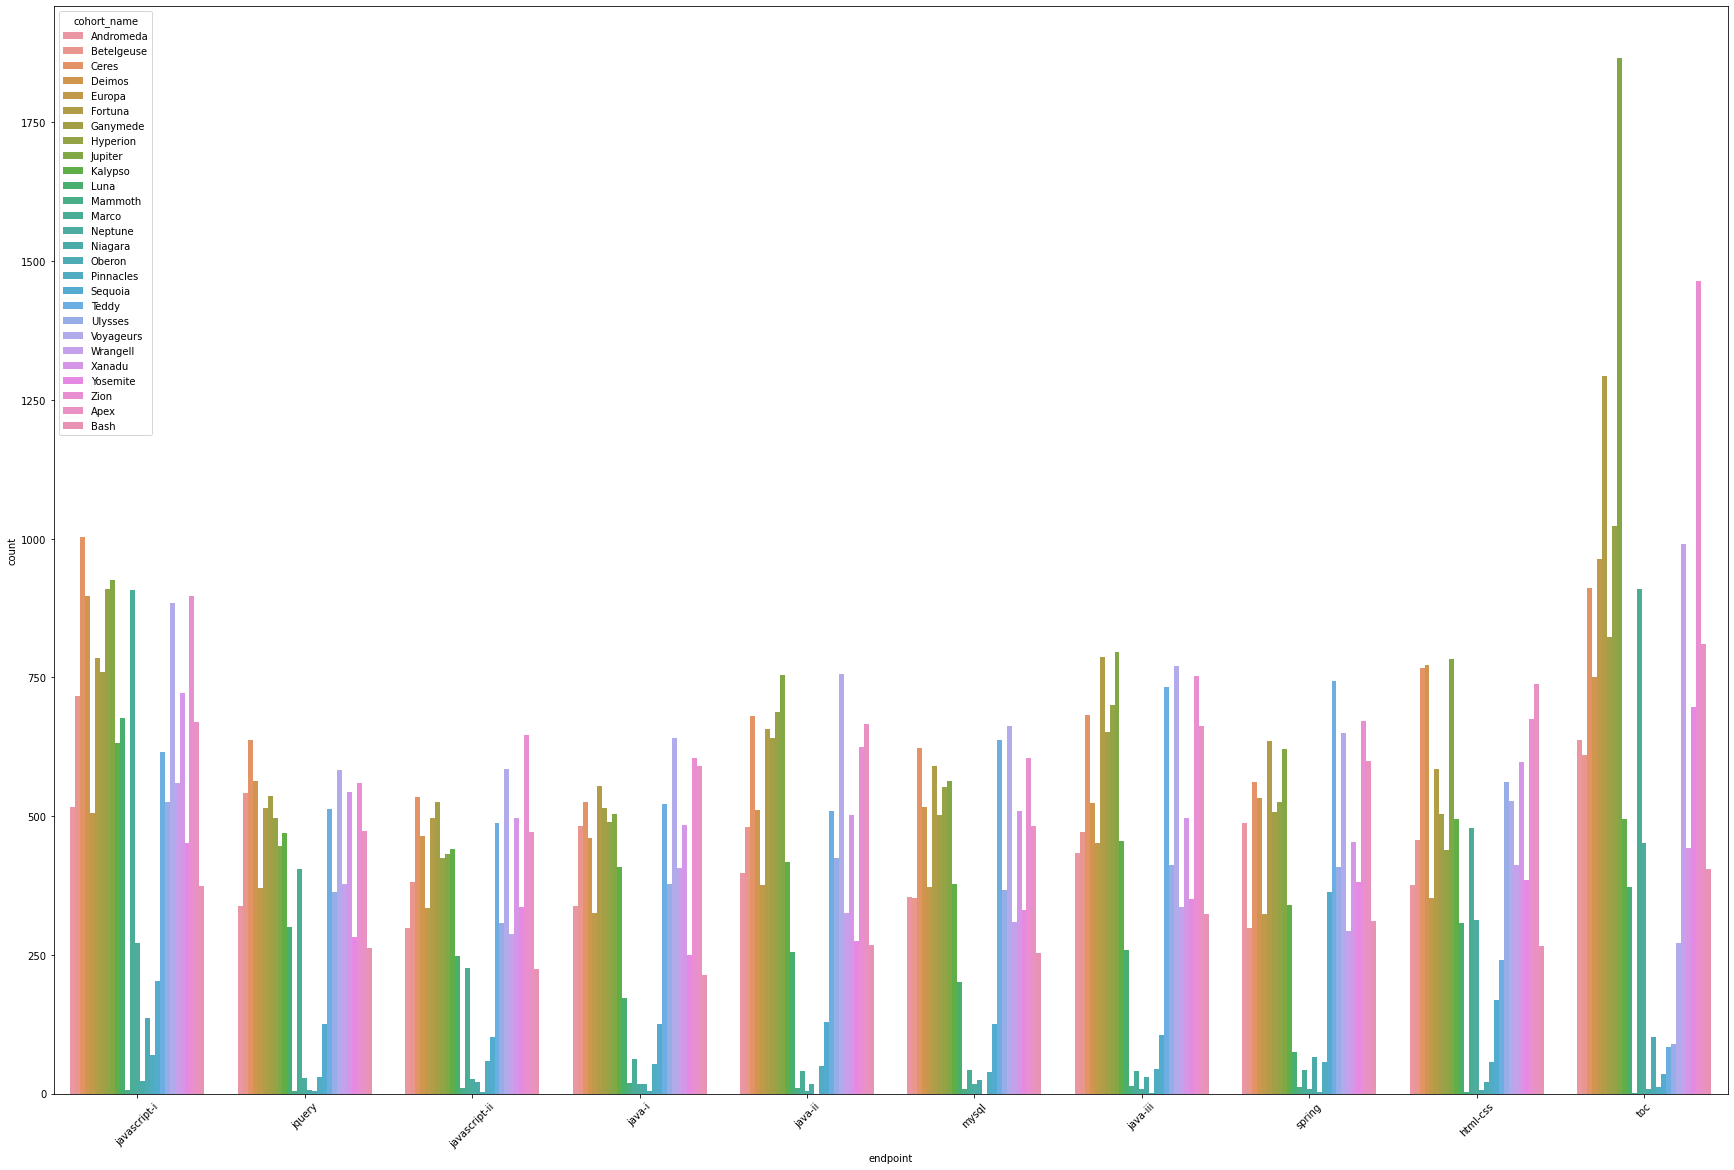

In [161]:
plt.figure(figsize=(30,20))
sns.countplot(data=java_wd_graph_set, x='endpoint',hue='cohort_name', hue_order = ['Andromeda', 'Betelgeuse', 'Ceres', 'Deimos',
       'Europa', 'Fortuna', 'Ganymede', 'Hyperion', 'Jupiter', 'Kalypso',
       'Luna', 'Mammoth', 'Marco', 'Neptune', 'Niagara', 'Oberon',
       'Pinnacles', 'Sequoia', 'Teddy', 'Ulysses', 'Voyageurs',
       'Wrangell', 'Xanadu', 'Yosemite', 'Zion', 'Apex', 'Bash'])
plt.xticks(rotation=45);

- The cohorts are organized alphabetically (and therefore chronologically).  There is a clear drop-off in lesson views for a few cohorts in the upper-middle
- javascript-i and toc are the most commonly accessed lessons, with a few obvious outliers for toc

### Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [117]:
temp[temp.program == 'data_science'].cohort_name.value_counts()

Darden      24086
Bayes       21472
Curie       17149
Easley      11018
Florence     5830
Name: cohort_name, dtype: int64